# Gráficos e Análise de Dados

In [8]:
import pickle
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [96]:
df = (
    pl.read_parquet("../data/imdb.parquet")
    .select(
        pl.col("id").alias("id"),
        pl.col("title").alias("titulo"),
        pl.col("vote_average").alias("nota_media"),
        pl.col("vote_count").alias("numero_votos"),
        pl.col("release_year").cast(pl.Int32).alias("ano_lancamento"),
        pl.col("Director").alias("diretor"),
        pl.col("genres_list").alias("genero"),
    )
    .unique(subset=["id"])
)

with pl.Config(
    float_precision=0,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline=True,
):
    print(
        df.describe()
    )


shape: (9, 8)
┌────────────┬───────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ id (f64)  ┆ titulo     ┆ nota_media ┆ numero_vo ┆ ano_lanca ┆ diretor   ┆ genero    │
│ (str)      ┆           ┆ (str)      ┆ (f64)      ┆ tos (f64) ┆ mento     ┆ (str)     ┆ (str)     │
│            ┆           ┆            ┆            ┆           ┆ (f64)     ┆           ┆           │
╞════════════╪═══════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 1.071.607 ┆ 1071607    ┆ 1.071.607  ┆ 1.071.607 ┆ 921.447   ┆ 1071607   ┆ 1071607   │
│ null_count ┆ 0         ┆ 0          ┆ 0          ┆ 0         ┆ 150.160   ┆ 0         ┆ 0         │
│ mean       ┆ 703.183   ┆ null       ┆ 2          ┆ 20        ┆ 1.999     ┆ null      ┆ null      │
│ std        ┆ 376.372   ┆ null       ┆ 3          ┆ 328       ┆ 27        ┆ null      ┆ null      │
│ min        ┆ 2         ┆            ┆ 0          ┆ 0         ┆ 1.800     ┆ 

In [7]:
df.with_columns(
    (pl.col("titulo") + " - " + pl.col("diretor")).alias("titulo_diretor"),
)["titulo_diretor"].n_unique()

1066709

In [9]:
df.is_duplicated().sum()

36

In [2]:
# Read pickel file
with open("../data/result_id.pkl", "rb") as f:
    data = pickle.load(f)

with open("../data/result_id_ordenado.pkl", "rb") as f:
    data_ordenado = pickle.load(f)

with open("../data/result_id_ordem_exec.pkl", "rb") as f:
    data_novo_algoritmo = pickle.load(f)

In [3]:
df_insercao = pl.DataFrame(data['result_insercao'])
df_busca = pl.DataFrame(data['result_search'])

df_insercao_ordenado = pl.DataFrame(data_ordenado['result_insercao'])
df_busca_ordenado = pl.DataFrame(data_ordenado['result_search'])

df_insercao_novo_algoritmo = pl.DataFrame(data_novo_algoritmo['result_insercao'])
df_busca_bst_novo_algoritmo = pl.DataFrame(data_novo_algoritmo['result_search_bst'])
df_busca_avl_novo_algoritmo = pl.DataFrame(data_novo_algoritmo['result_search_avl'])

In [98]:
with pl.Config(
    float_precision=0,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline=True,
):
    print(df_insercao.describe())

shape: (9, 6)
┌────────────┬──────────────┬───────────────────┬──────────────────┬────────────┬──────────────────┐
│ statistic  ┆ n_iter (f64) ┆ tempo_insercao_bs ┆ tempo_insercao_a ┆ altura_bst ┆ altura_avl (f64) │
│ (str)      ┆              ┆ t (f64)           ┆ vl (f64)         ┆ (f64)      ┆                  │
╞════════════╪══════════════╪═══════════════════╪══════════════════╪════════════╪══════════════════╡
│ count      ┆ 10           ┆ 10                ┆ 10               ┆ 10         ┆ 10               │
│ null_count ┆ 0            ┆ 0                 ┆ 0                ┆ 0          ┆ 0                │
│ mean       ┆ 4            ┆ 4.696             ┆ 10.631           ┆ 48         ┆ 23               │
│ std        ┆ 3            ┆ 605               ┆ 170              ┆ 1          ┆ 0                │
│ min        ┆ 0            ┆ 3.298             ┆ 10.380           ┆ 46         ┆ 23               │
│ 25%        ┆ 2            ┆ 4.319             ┆ 10.521           ┆ 48      

In [105]:
with pl.Config(
    float_precision=4,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline=True,
):
    print(df_busca.describe())


shape: (9, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ statistic    ┆ n_iter      ┆ n_search    ┆ tempo_busca ┆ tempo_busca ┆ altura_bst  ┆ altura_avl  │
│ (str)        ┆ (f64)       ┆ (f64)       ┆ _avl (f64)  ┆ _bst (f64)  ┆ (f64)       ┆ (f64)       │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ count        ┆ 1.000,0000  ┆ 1.000,0000  ┆ 1.000,0000  ┆ 1.000,0000  ┆ 1.000,0000  ┆ 1.000,0000  │
│ null_count   ┆ 0,0000      ┆ 0,0000      ┆ 0,0000      ┆ 0,0000      ┆ 0,0000      ┆ 0,0000      │
│ mean         ┆ 4,5000      ┆ 100,0000    ┆ 0,0177      ┆ 0,0080      ┆ 48,5000     ┆ 23,0000     │
│ std          ┆ 2,8737      ┆ 0,0000      ┆ 0,0912      ┆ 0,0041      ┆ 1,3608      ┆ 0,0000      │
│ min          ┆ 0,0000      ┆ 100,0000    ┆ 0,0069      ┆ 0,0029      ┆ 46,0000     ┆ 23,0000     │
│ 25%          ┆ 2,0000      ┆ 100,0000    ┆ 0,0110      ┆ 0,0060      ┆ 48,0

In [103]:
with pl.Config(
    float_precision=0,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline=True,
):
    print(df_insercao_ordenado.describe())

shape: (9, 6)
┌────────────┬──────────────┬───────────────────┬──────────────────┬────────────┬──────────────────┐
│ statistic  ┆ n_iter (f64) ┆ tempo_insercao_bs ┆ tempo_insercao_a ┆ altura_bst ┆ altura_avl (f64) │
│ (str)      ┆              ┆ t (f64)           ┆ vl (f64)         ┆ (f64)      ┆                  │
╞════════════╪══════════════╪═══════════════════╪══════════════════╪════════════╪══════════════════╡
│ count      ┆ 1            ┆ 1                 ┆ 1                ┆ 1          ┆ 1                │
│ null_count ┆ 0            ┆ 0                 ┆ 0                ┆ 0          ┆ 0                │
│ mean       ┆ 0            ┆ 402.466           ┆ 595              ┆ 107.159    ┆ 16               │
│ std        ┆ null         ┆ null              ┆ null             ┆ null       ┆ null             │
│ min        ┆ 0            ┆ 402.466           ┆ 595              ┆ 107.159    ┆ 16               │
│ 25%        ┆ 0            ┆ 402.466           ┆ 595              ┆ 107.159 

In [101]:
with pl.Config(
    float_precision=4,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline=True,
):
    print(df_busca_ordenado.describe())

shape: (9, 7)
┌───────────────┬──────────┬──────────┬───────────────┬──────────────┬──────────────┬──────────────┐
│ statistic     ┆ n_iter   ┆ n_search ┆ tempo_busca_a ┆ tempo_busca_ ┆ altura_bst   ┆ altura_avl   │
│ (str)         ┆ (f64)    ┆ (f64)    ┆ vl (f64)      ┆ bst (f64)    ┆ (f64)        ┆ (f64)        │
╞═══════════════╪══════════╪══════════╪═══════════════╪══════════════╪══════════════╪══════════════╡
│ count         ┆ 100,0000 ┆ 100,0000 ┆ 100,0000      ┆ 100,0000     ┆ 100,0000     ┆ 100,0000     │
│ null_count    ┆ 0,0000   ┆ 0,0000   ┆ 0,0000        ┆ 0,0000       ┆ 0,0000       ┆ 0,0000       │
│ mean          ┆ 0,0000   ┆ 100,0000 ┆ 0,0131        ┆ 3,8790       ┆ 107.159,0000 ┆ 16,0000      │
│ std           ┆ 0,0000   ┆ 0,0000   ┆ 0,0046        ┆ 2,3446       ┆ 0,0000       ┆ 0,0000       │
│ min           ┆ 0,0000   ┆ 100,0000 ┆ 0,0069        ┆ 0,0439       ┆ 107.159,0000 ┆ 16,0000      │
│ 25%           ┆ 0,0000   ┆ 100,0000 ┆ 0,0091        ┆ 2,0831       ┆ 107.15

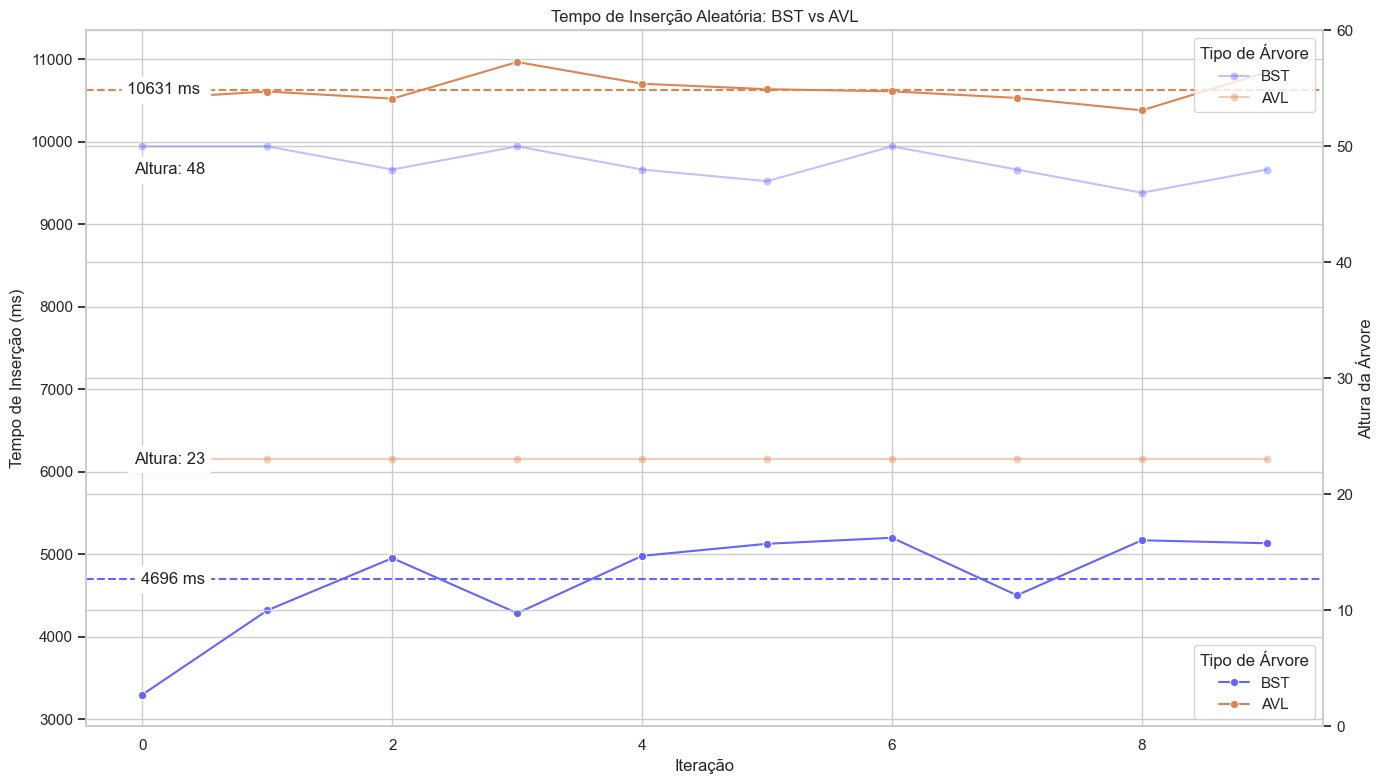

In [50]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_insercao, x="n_iter", y="tempo_insercao_bst", marker="o", label="BST", color="#6464FF"
)
sns.lineplot(
    data=df_insercao, x="n_iter", y="tempo_insercao_avl", marker="o", label="AVL", color="#DD8453"
)


#tempo médio
plt.axhline(df_insercao["tempo_insercao_bst"].mean(), color="#6464FF", linestyle="--")
plt.axhline(df_insercao["tempo_insercao_avl"].mean(), color="#DD8453", linestyle="--")

#anotação com o tempo médio
plt.text(0.5, round(df_insercao["tempo_insercao_bst"].mean()), f"{round(df_insercao['tempo_insercao_bst'].mean()):.0f} ms", ha='right', va='center', backgroundcolor='w')
plt.text(0.5, round(df_insercao["tempo_insercao_avl"].mean()), f"{round(df_insercao['tempo_insercao_avl'].mean()):.0f} ms ", ha='right', va='center', backgroundcolor='w')

plt.xlabel('Iteração')
plt.ylabel('Tempo de Inserção (ms)')
plt.title('Tempo de Inserção Aleatória: BST vs AVL')
plt.legend(title='Tipo de Árvore')
plt.tight_layout()

# altura arvore eixo direito
plt.twinx()
plt.ylim(0, 60)
sns.lineplot(
    data=df_insercao, x="n_iter", y="altura_bst", marker="o", label="BST", color="#6464FF", alpha=0.4
)
sns.lineplot(
    data=df_insercao, x="n_iter", y="altura_avl", marker="o", label="AVL", color="#DD8453", alpha=0.4
)

plt.text(
    0.5,
    round(df_insercao["altura_bst"].mean()),
    f"Altura: {round(df_insercao['altura_bst'].mean()):.0f}",
    ha="right",
    va="center",
    backgroundcolor="w",
)
plt.text(
    0.5,
    round(df_insercao["altura_avl"].mean()),
    f"Altura: {round(df_insercao['altura_avl'].mean()):.0f}",
    ha="right",
    va="center",
    backgroundcolor="w",
)


plt.ylabel("Altura da Árvore")
plt.legend(title="Tipo de Árvore")
plt.tight_layout()


plt.show()

In [14]:
df_busca_avl_novo_algoritmo

n_iter,n_search,tempo_busca_avl,altura_avl
i64,i64,f64,i64
0,100,0.004768,23
0,100,0.004053,23
0,100,0.003099,23
0,100,0.005007,23
0,100,0.003815,23
…,…,…,…
9,100,0.003815,23
9,100,0.003099,23
9,100,0.002861,23


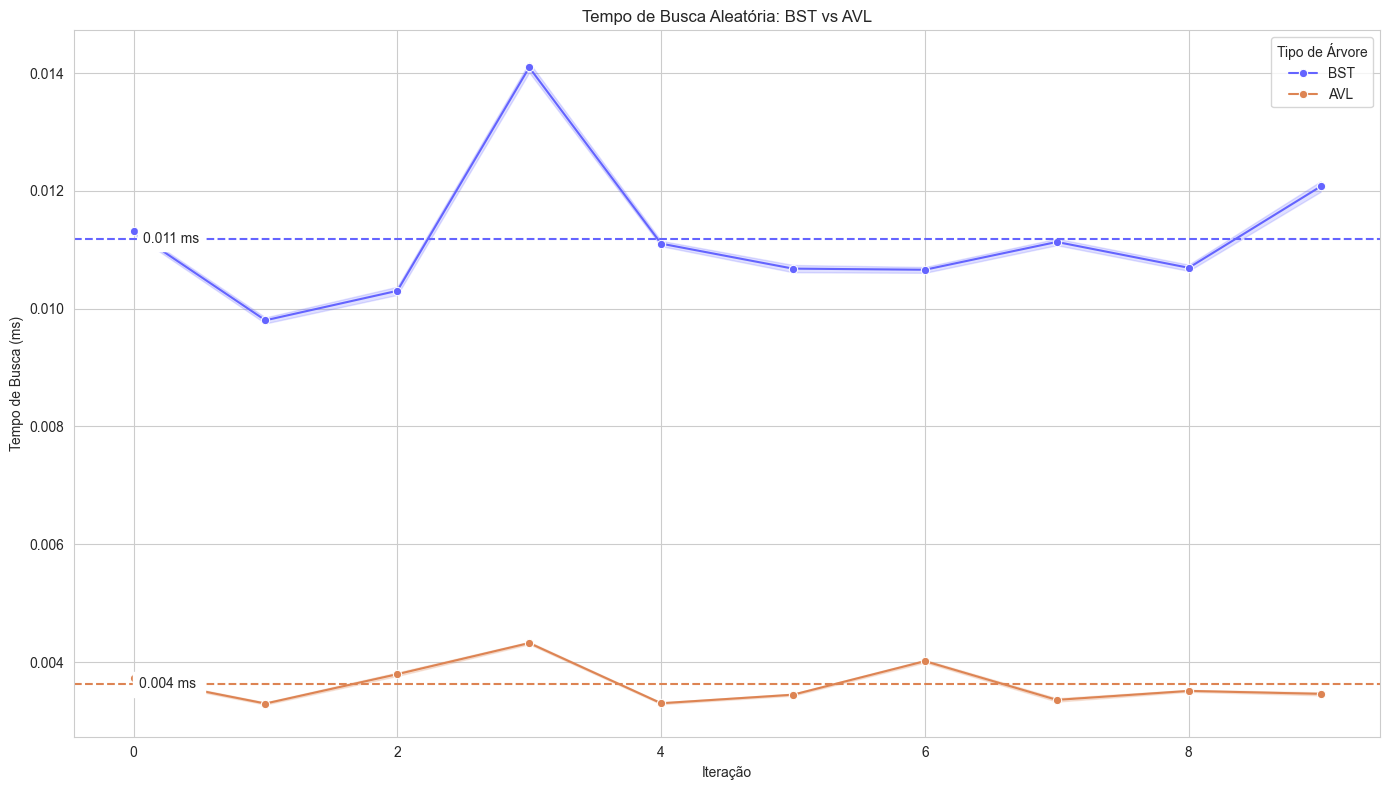

In [12]:
plt.figure(figsize=(14, 8))

df_aux = df_busca_bst_novo_algoritmo.join(
    df_busca_avl_novo_algoritmo, on=["n_iter", "n_search"]
)

sns.lineplot(
    data=df_aux,
    x="n_iter",
    y="tempo_busca_bst",
    marker="o",
    label="BST",
    color="#6464FF",
)
sns.lineplot(
    data=df_aux, x="n_iter", y="tempo_busca_avl", marker="o", label="AVL", color="#DD8453"
)


# tempo médio
plt.axhline(df_aux["tempo_busca_bst"].mean(), color="#6464FF", linestyle="--")
plt.axhline(df_aux["tempo_busca_avl"].mean(), color="#DD8453", linestyle="--")

# anotação com o tempo médio
plt.text(
    0.5,
    df_aux["tempo_busca_bst"].mean(),
    f"{df_aux['tempo_busca_bst'].mean():.3f} ms",
    ha="right",
    va="center",
    backgroundcolor="w",
)
plt.text(
    0.5,
    df_aux["tempo_busca_avl"].mean(),
    f"{df_aux['tempo_busca_avl'].mean():.3f} ms ",
    ha="right",
    va="center",
    backgroundcolor="w",
)

plt.xlabel("Iteração")
plt.ylabel("Tempo de Busca (ms)")
plt.title("Tempo de Busca Aleatória: BST vs AVL")
plt.legend(title="Tipo de Árvore")
plt.tight_layout()
plt.show()


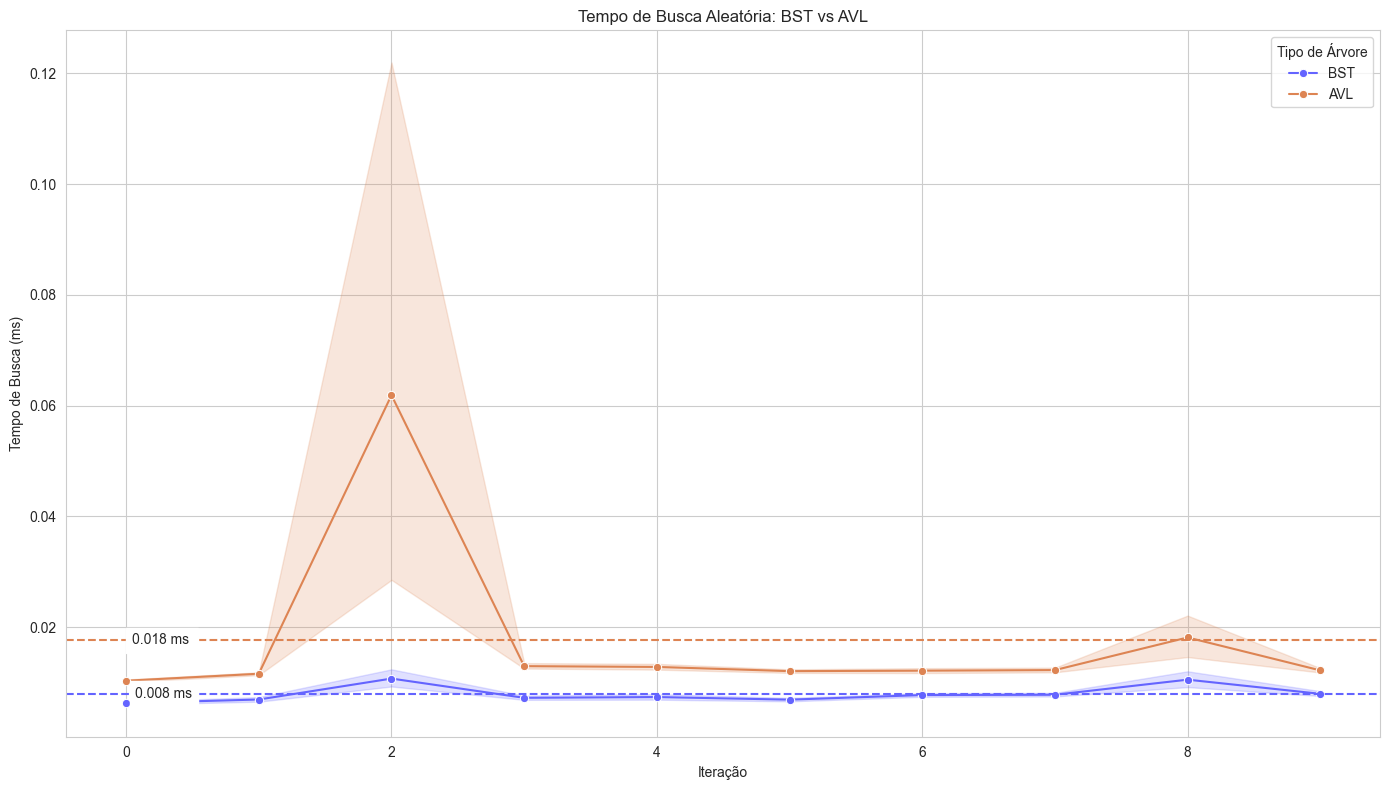

In [10]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_busca,
    x="n_iter",
    y="tempo_busca_bst",
    marker="o",
    label="BST",
    color="#6464FF",
)
sns.lineplot(
    data=df_busca,
    x="n_iter",
    y="tempo_busca_avl",
    marker="o",
    label="AVL",
    color="#DD8453",
)


# tempo médio
plt.axhline(df_busca["tempo_busca_bst"].mean(), color="#6464FF", linestyle="--")
plt.axhline(df_busca["tempo_busca_avl"].mean(), color="#DD8453", linestyle="--")

# anotação com o tempo médio
plt.text(
    0.5,
    df_busca["tempo_busca_bst"].mean(),
    f"{df_busca['tempo_busca_bst'].mean():.3f} ms",
    ha="right",
    va="center",
    backgroundcolor="w",
)
plt.text(
    0.5,
    df_busca["tempo_busca_avl"].mean(),
    f"{df_busca['tempo_busca_avl'].mean():.3f} ms ",
    ha="right",
    va="center",
    backgroundcolor="w",
)

plt.xlabel("Iteração")
plt.ylabel("Tempo de Busca (ms)")
plt.title("Tempo de Busca Aleatória: BST vs AVL")
plt.legend(title="Tipo de Árvore")
plt.tight_layout()
plt.show()


In [55]:
df_busca_ordenado

n_iter,n_search,tempo_busca_avl,tempo_busca_bst,altura_bst,altura_avl
i64,i64,f64,f64,i64,i64
0,100,0.010967,8.038998,107159,16
0,100,0.017881,1.750946,107159,16
0,100,0.023842,3.124952,107159,16
0,100,0.01812,2.781153,107159,16
0,100,0.019789,5.955935,107159,16
…,…,…,…,…,…
0,100,0.010967,5.885839,107159,16
0,100,0.013828,1.385927,107159,16
0,100,0.006914,4.971027,107159,16


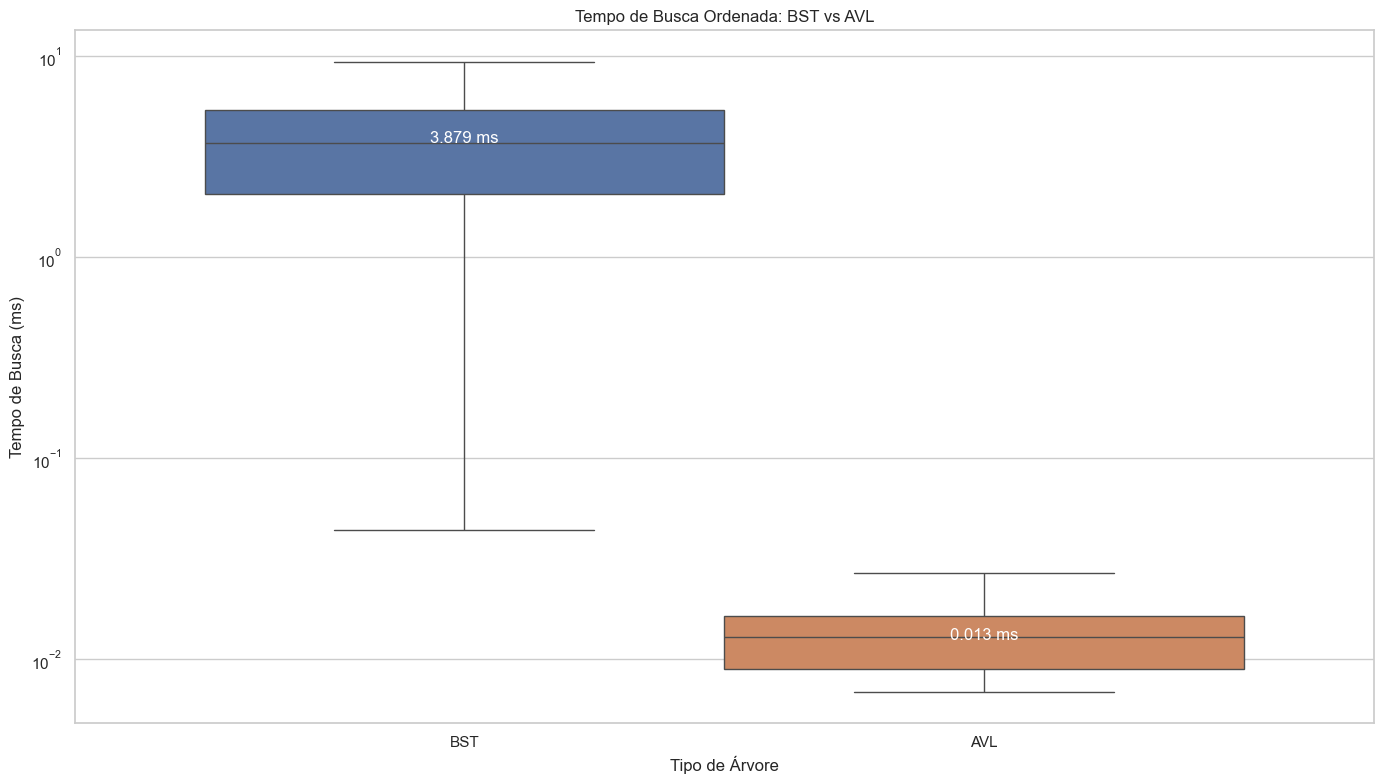

In [73]:
# Boxplot tempo busca ordenada
df_aux = df_busca_ordenado.unpivot(index=["n_iter"], on=["tempo_busca_bst", "tempo_busca_avl"], variable_name="tipo_arvore", value_name="tempo")

# Escala logarítmica eixo y
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_aux, x="n_iter", y="tempo", hue="tipo_arvore")
plt.yscale("log")
plt.xlabel("Tipo de Árvore")
plt.ylabel("Tempo de Busca (ms)")
plt.title("Tempo de Busca Ordenada: BST vs AVL")
#hidden legend
plt.legend([],[], frameon=False)
#renomear labels
plt.xticks([-0.2, 0.2], ['BST', 'AVL'])

#anotação com o tempo médio
plt.text(
    -0.2,
    df_busca_ordenado["tempo_busca_bst"].mean(),
    f"{df_busca_ordenado['tempo_busca_bst'].mean():.3f} ms",
    ha="center",
    va="center",
    color = 'w',
)
plt.text(0.2, df_busca_ordenado["tempo_busca_avl"].mean(), f"{df_busca_ordenado['tempo_busca_avl'].mean():.3f} ms", ha='center', va='center', color='w')


plt.tight_layout()
plt.show()


In [75]:
df_insercao_ordenado

n_iter,tempo_insercao_bst,tempo_insercao_avl,altura_bst,altura_avl
i64,f64,f64,i64,i64
0,402466.085672,595.336914,107159,16


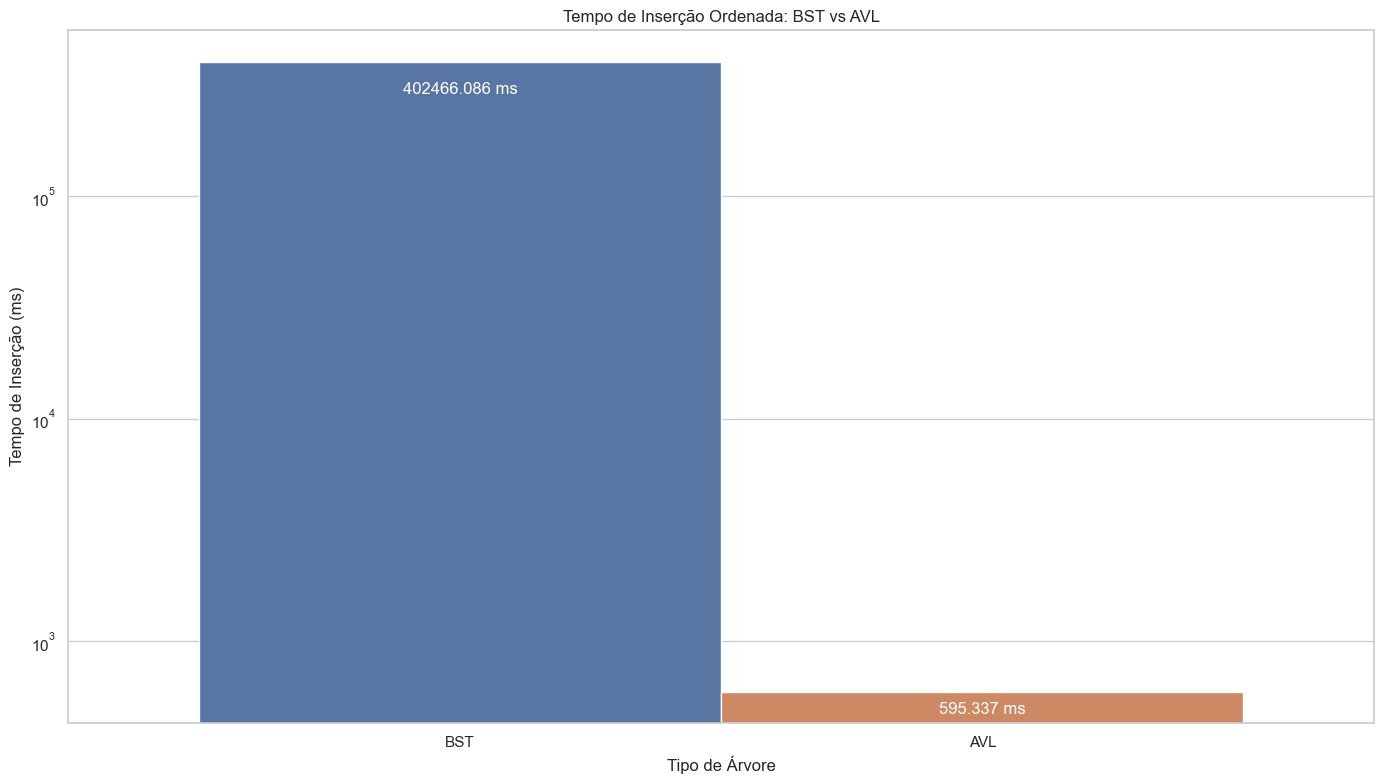

In [91]:
# Barplot com tempo ordenado de inserção
df_aux = df_insercao_ordenado.unpivot(index=["n_iter"], on=["tempo_insercao_bst", "tempo_insercao_avl"], variable_name="tipo_arvore", value_name="tempo")

plt.figure(figsize=(14, 8))
sns.barplot(data=df_aux, x="n_iter", y="tempo", hue="tipo_arvore")

plt.yscale("log")
plt.xlabel("Tipo de Árvore")
plt.ylabel("Tempo de Inserção (ms)")
plt.title("Tempo de Inserção Ordenada: BST vs AVL")
# hidden legend
plt.legend([], [], frameon=False)
# renomear labels
plt.xticks([-0.2, 0.2], ["BST", "AVL"])


# anotação com o tempo médio
plt.text(
    -0.2,
    df_insercao_ordenado["tempo_insercao_bst"].mean() - 100000,
    f"{df_insercao_ordenado['tempo_insercao_bst'].mean():.3f} ms",
    ha="center",
    va="center",
    color="w",
)

plt.text(
    0.2,
    df_insercao_ordenado["tempo_insercao_avl"].mean() - 100,
    f"{df_insercao_ordenado['tempo_insercao_avl'].mean():.3f} ms",
    ha="center",
    va="center",
    color="w",
)

plt.tight_layout()
plt.show()
